In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
Data=pd.read_csv('diabetes.csv')
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

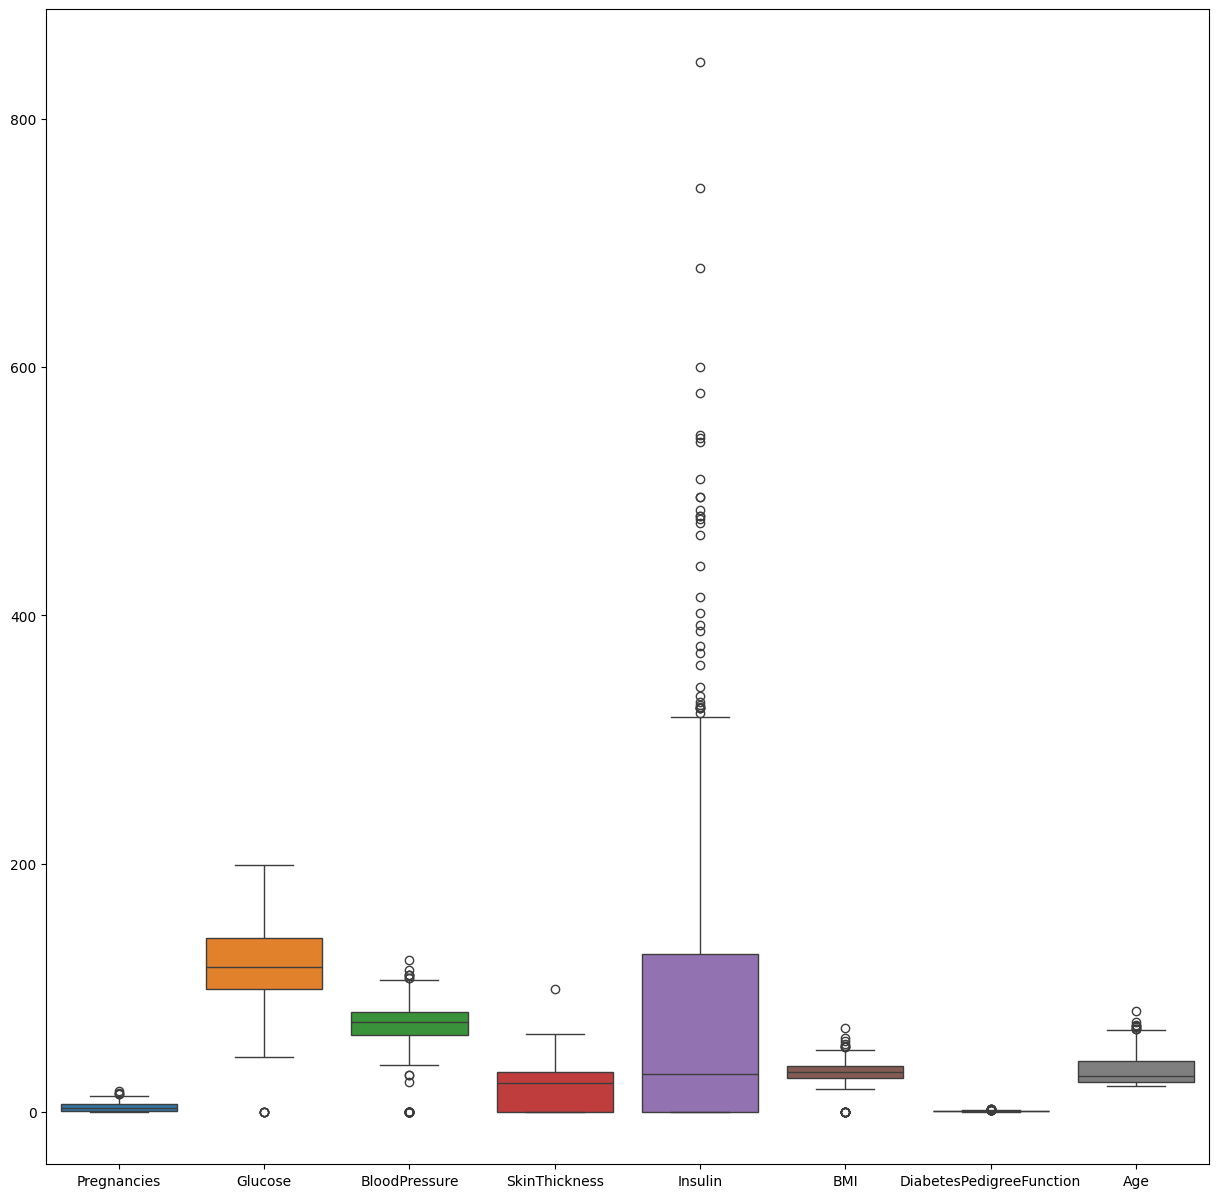

In [4]:
X= Data.drop('Outcome', axis=1)
Y= Data['Outcome']
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=X, ax=ax)

For what features we choose median instead of mean

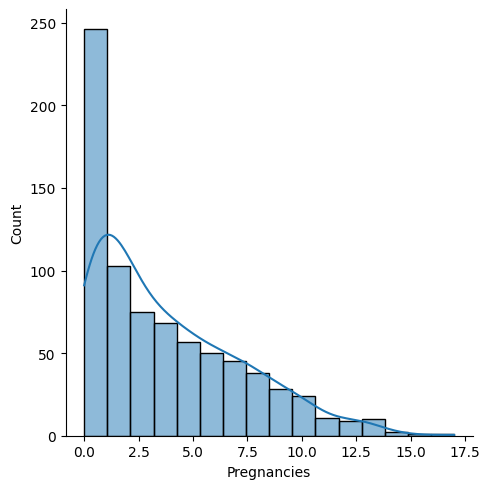

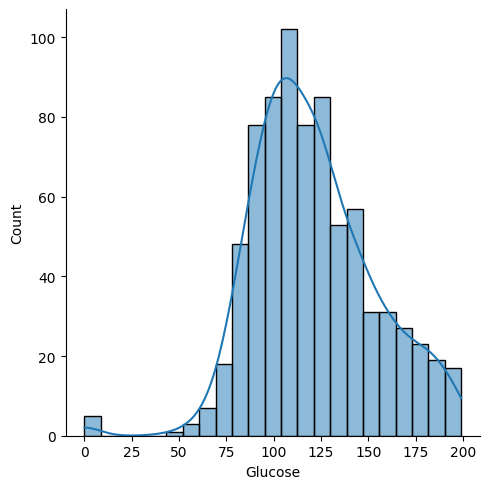

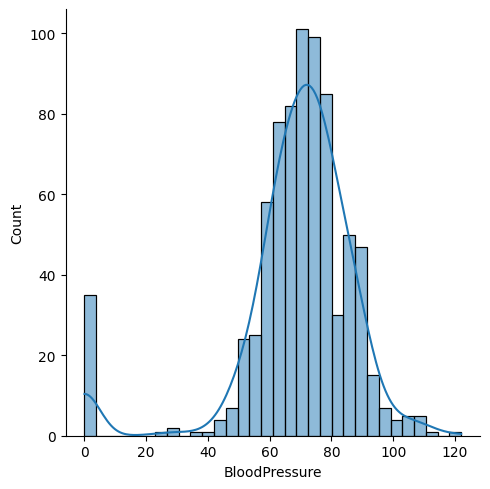

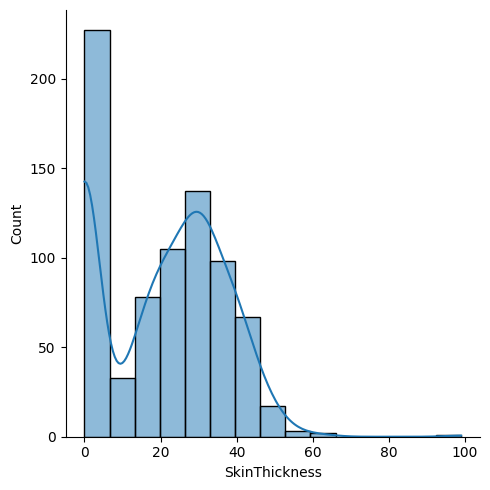

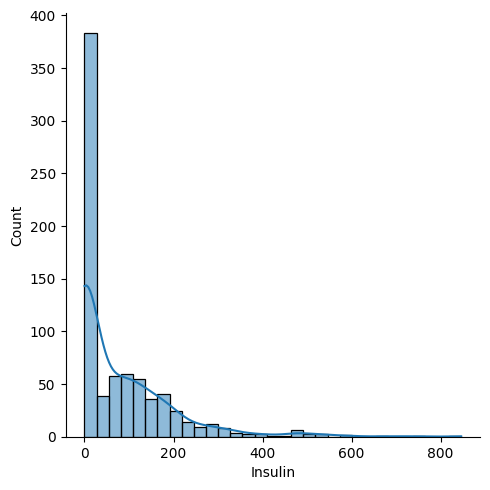

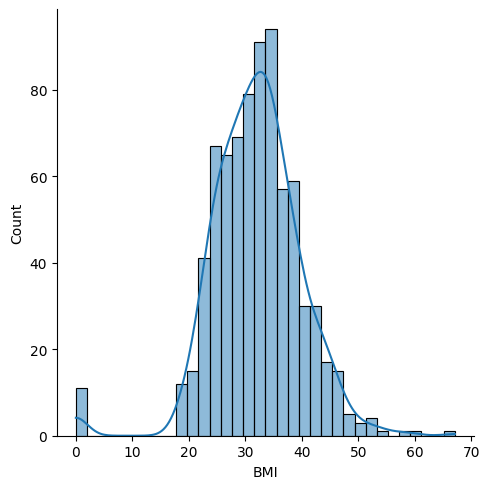

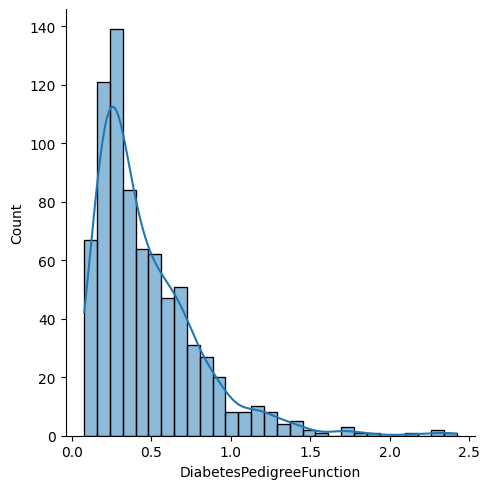

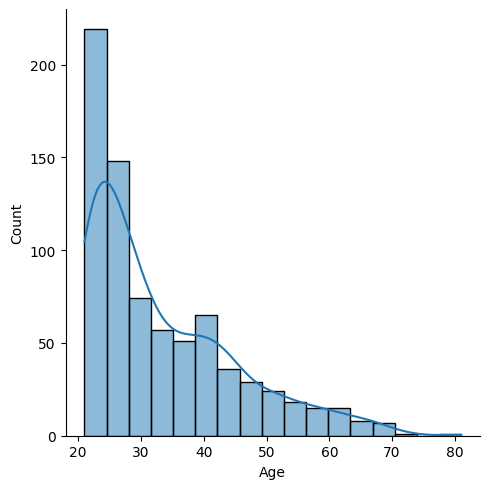

In [5]:
sns.displot(Data['Pregnancies'] ,kde=True)
sns.displot(Data['Glucose'] ,kde=True)
sns.displot(Data['BloodPressure'] ,kde=True)
sns.displot(Data['SkinThickness'] ,kde=True)
sns.displot(Data['Insulin'] ,kde=True)
sns.displot(Data['BMI'] ,kde=True)
sns.displot(Data['DiabetesPedigreeFunction'] ,kde=True)
sns.displot(Data['Age'] ,kde=True)

<Axes: >

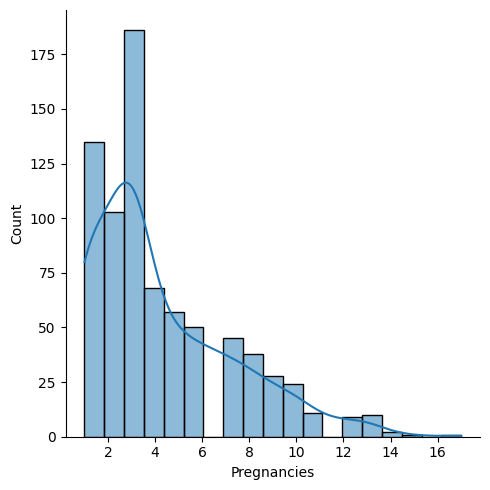

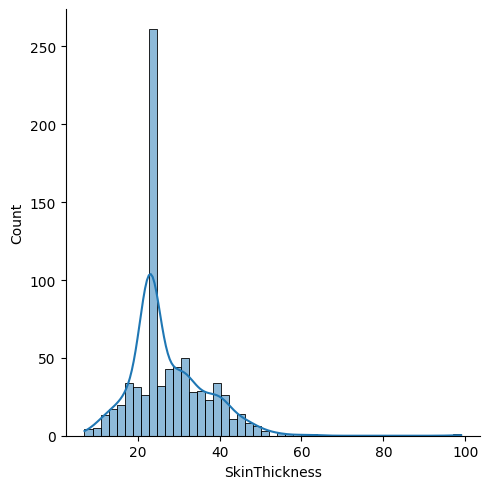

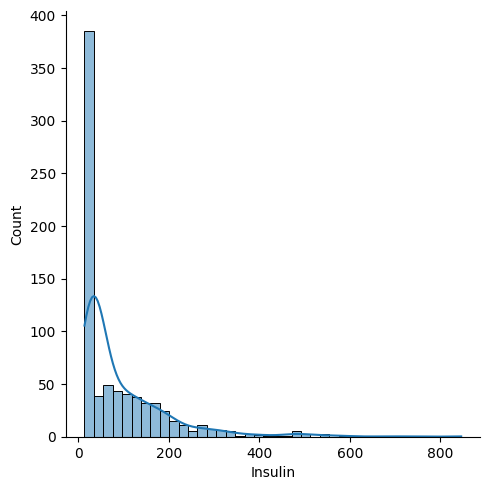

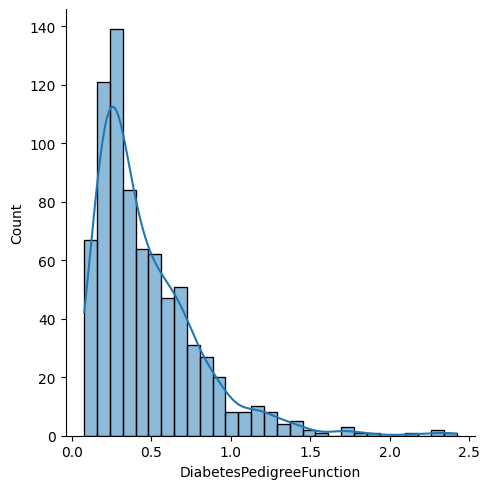

In [ ]:
X['Pregnancies']=X['Pregnancies'].replace(0, X['Pregnancies'].median())
X['Glucose']=X['Glucose'].replace(0, X['Glucose'].mean())
X['BloodPressure']=X['BloodPressure'].replace(0, X['BloodPressure'].mean())
X['SkinThickness']=X['SkinThickness'].replace(0, X['SkinThickness'].median())
X['Insulin']=X['Insulin'].replace(0, X['Insulin'].median())
X['BMI']=X['BMI'].replace(0, X['BMI'].mean())
X['DiabetesPedigreeFunction']=X['DiabetesPedigreeFunction'].replace(0, X['DiabetesPedigreeFunction'].median())
X['Age']=X['Age'].replace(0, X['Age'].median())
sns.displot(X['Pregnancies'] ,kde=True)
sns.displot(X['SkinThickness'] ,kde=True)
sns.displot(X['Insulin'] ,kde=True)
sns.displot(X['DiabetesPedigreeFunction'] ,kde=True)

Removing Outlier :Approch 1 using Qunatile

In [8]:
for i in X.columns:
    Q1=X[i].quantile(0.25)
    Q3=X[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    X[i]=np.where(X[i]<lower_bound, lower_bound, X[i])
    X[i]=np.where(X[i]>upper_bound, upper_bound, X[i])
    

<Axes: >

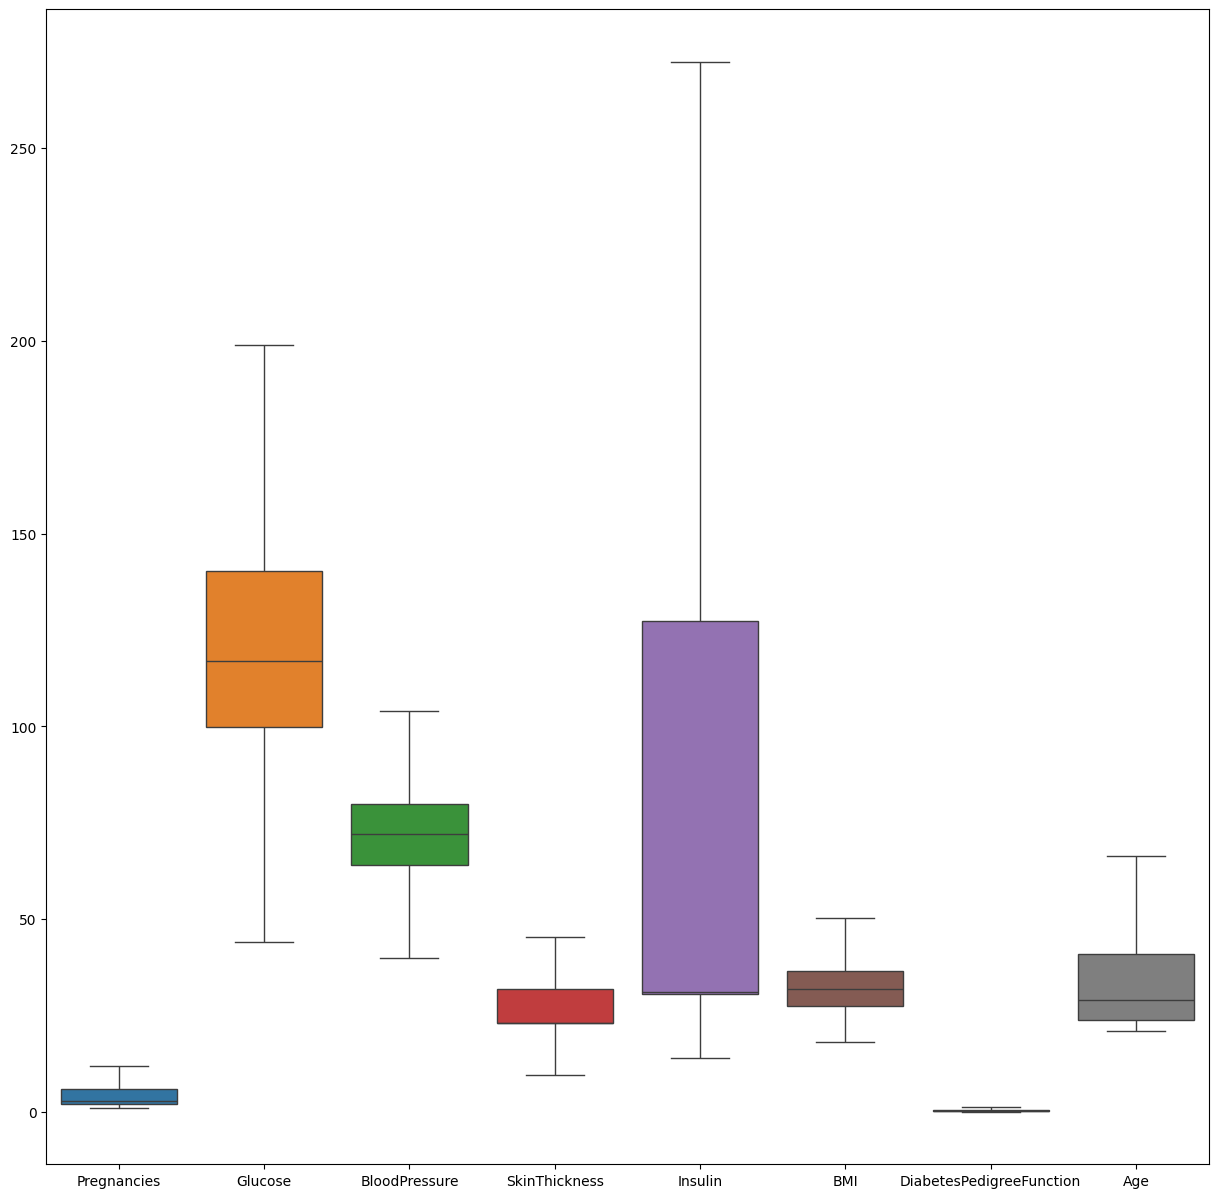

In [9]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=X, ax=ax)

In [11]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


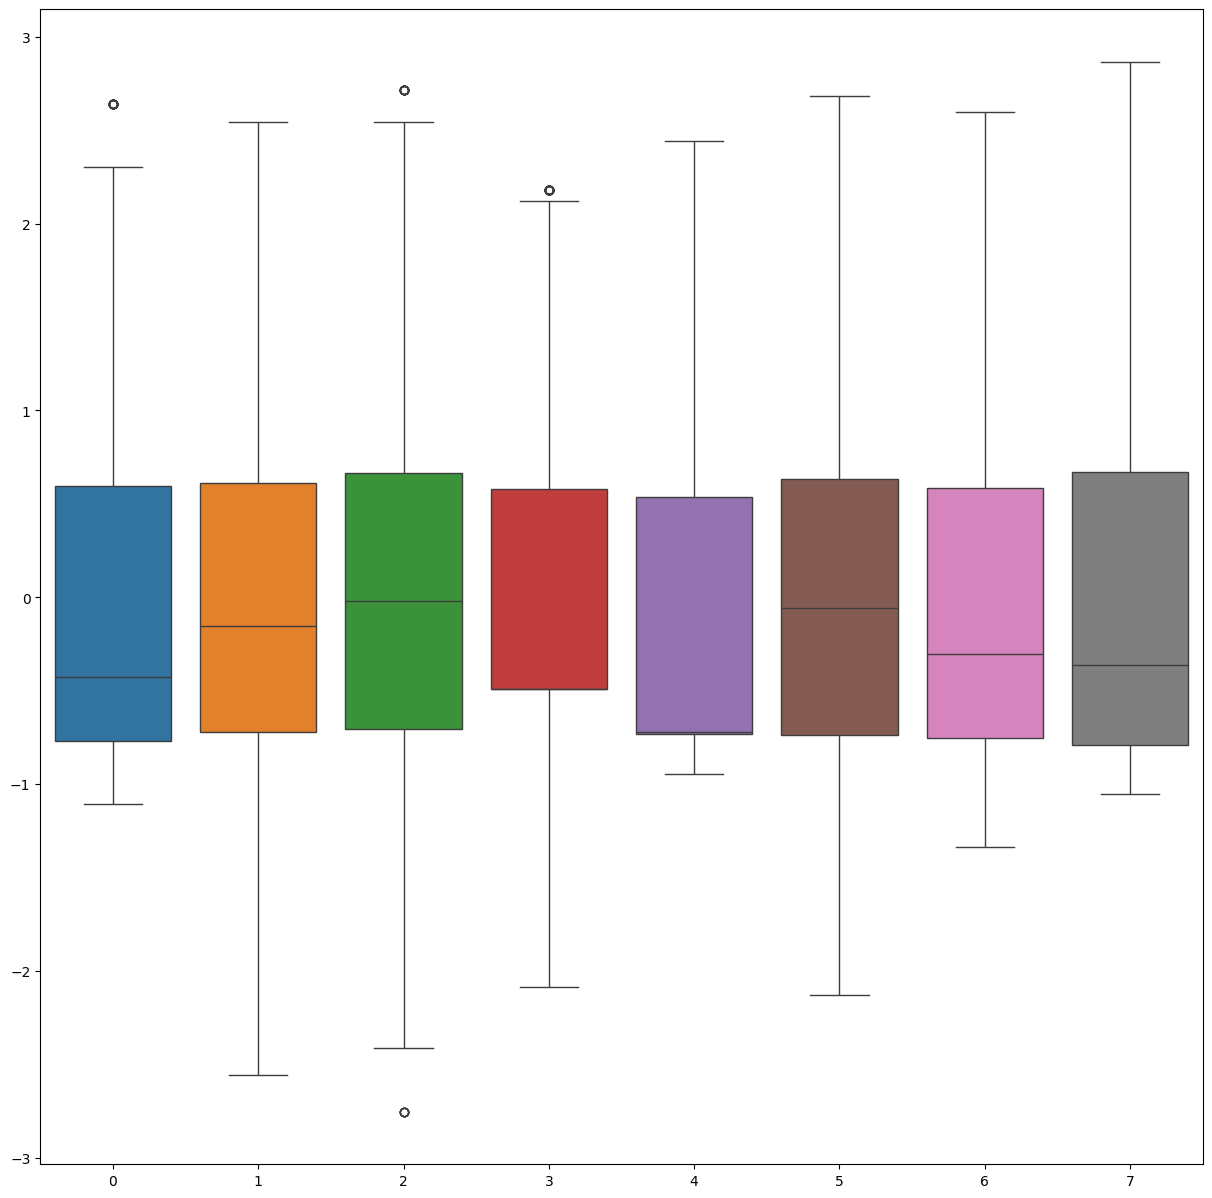

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=X_scaled, ax=ax)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


Data Imbalancing-common in health care sector

Doing by Oversampling,undersampling,smote

In [19]:
Y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_smote, Y_train_smote= smote.fit_resample(X_train, Y_train)
Y_train_smote.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train_smote, Y_train_smote)
Y_pred=model.predict(X_test)
Y_pred


array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

Performance Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('classfication report:',classification_report(Y_test, Y_pred))
print('Confusion metrics:',confusion_matrix(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))

classfication report:               precision    recall  f1-score   support

           0       0.80      0.68      0.73        99
           1       0.54      0.69      0.61        55

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.71      0.68      0.69       154

Confusion metrics: [[67 32]
 [17 38]]
Accuracy: 0.6818181818181818


In [ ]:
import picklet
pickle.dump(model, open('diabetes_model.pkl', 'wb'))

In [ ]:
data=pickle.load(open('diabetes_model.pkl', 'rb'))